# Project : Developing an AI Model for High-Risk Pregnancy Prediction

This project aims to develop an AI model for high-risk pregnancy (HRP) prediction which can significantly improve maternal health management in rural and underserved areas. This aligns with ZMQ's MIRA project's existing goal of early identification of HRPs and connecting women to public health centers for timely intervention, ultimately contributing to the reduction of maternal and infant mortality rates.


# I. Data Loading and Exploratory Data Analysis

In this step we import the necessary libraries and analyze the given data to understand it better and figure out relations between different parameters.

In [171]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import string
from difflib import SequenceMatcher
from textblob import TextBlob

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import os
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [172]:
xlsx_link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQUCpowuTswiTnEoiawIr8SGlSTWjNxz4hqWdAt8y9eqHSUPAM5V3I5fStiQ3_gLw/pub?output=xlsx'


In [173]:
data = pd.read_excel(xlsx_link)

In [174]:
type(data)

pandas.core.frame.DataFrame

In [175]:
data.shape

(999, 18)

In [176]:
data.columns

Index(['ANCC REGISTER', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [177]:
data.head()

,ANCC REGISTER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Name,Age,Gravida,TiTi Tika,গর্ভকাল,ওজন,উচ্চতা,রক্ত চাপ,রক্তস্বল্পতা,জন্ডিস,গর্ভস্হ শিশু অবস্থান,গর্ভস্হ শিশু নাড়াচাড়া,গর্ভস্হ শিশু হৃৎস্পন্দন,প্রসাব পরিক্ষা এলবুমিন,প্রসাব পরিক্ষা সুগার,VDRL,HRsAG,ঝুকিপূর্ণ গর্ভ
1,Rituporna,18,1st,1st,38 week,50 kg,5.3'',100/60,NaN,NaN,Normal,Normal,140m,NaN,Yes,Negative,Negative,Yes
2,Moina,25,2nd,2nd,38 week,60 kg,5.2'',100/70,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,No
3,Rabeya,20,1st,1st,30 week,55 kg,5.0'',100/60,NaN,NaN,Normal,Normal,120m,NaN,Yes,Negative,Negative,Yes
4,Shorna,22,1st,3rd,35 week,51 kg,5.4'',110/65,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,Yes


In [178]:
data.tail()

,ANCC REGISTER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
994,Rekha,22,1st,1st,20 week,49 kg,5.6'',90/60,NaN,NaN,Normal,Normal,150m,NaN,Yes,Positive,Negative,Yes
995,Akhi Moni,22,1st,2nd,30 week,45 kg,5.3'',110/80,NaN,NaN,Abnormal,Normal,140m,NaN,Yes,Negative,Negative,No
996,Puja,19,1st,3rd,30 week,50 kg,5.2'',100/70,NaN,NaN,Normal,Normal,140m,NaN,Yes,Positive,Negative,Yes
997,Shabnur,30,2nd,2nd,30 week,49 kg,5.1'',90/60,NaN,NaN,Normal,Normal,130m,NaN,Yes,Negative,Negative,Yes
998,Tayba,25,1st,1st,30 week,45 kg,5.0'',90/60,NaN,NaN,Abnormal,Normal,120m,NaN,Yes,Positive,Negative,Yes


In [179]:
data.dtypes

,0
ANCC REGISTER,object
Unnamed: 1,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object
Unnamed: 5,object
Unnamed: 6,object
Unnamed: 7,object
Unnamed: 8,object
Unnamed: 9,object


# II. Data Preprocessing
This is an important step wherein we prepare our data beforehand before training our model on it. This ensures the accuracy, completeness, and relevance of our data for analysis and machine learning models. It involves several processes:

1. Data Cleaning

This involves handling NULL values, duplicate values, outliers and changing column names for better understanding.



In [180]:
data.columns = ['Name', 'Age', 'Gravida', 'TiTi Tika', 'Gestational Age, weeks', 'Weight, kg', 'Height, ft','Blood Pressure',
                'Anemia', 'Jaundice', 'Fetal Position', 'Fetal Movements', 'Fetal Heartbeat,m','Urine Test Albumin', 'Urine Test Sugar',
                'VDRL', 'HRsAG', 'High-Risk Pregnancy']

In [181]:
data

,Name,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg","Height, ft",Blood Pressure,Anemia,Jaundice,Fetal Position,Fetal Movements,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy
0,Name,Age,Gravida,TiTi Tika,গর্ভকাল,ওজন,উচ্চতা,রক্ত চাপ,রক্তস্বল্পতা,জন্ডিস,গর্ভস্হ শিশু অবস্থান,গর্ভস্হ শিশু নাড়াচাড়া,গর্ভস্হ শিশু হৃৎস্পন্দন,প্রসাব পরিক্ষা এলবুমিন,প্রসাব পরিক্ষা সুগার,VDRL,HRsAG,ঝুকিপূর্ণ গর্ভ
1,Rituporna,18,1st,1st,38 week,50 kg,5.3'',100/60,NaN,NaN,Normal,Normal,140m,NaN,Yes,Negative,Negative,Yes
2,Moina,25,2nd,2nd,38 week,60 kg,5.2'',100/70,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,No
3,Rabeya,20,1st,1st,30 week,55 kg,5.0'',100/60,NaN,NaN,Normal,Normal,120m,NaN,Yes,Negative,Negative,Yes
4,Shorna,22,1st,3rd,35 week,51 kg,5.4'',110/65,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Rekha,22,1st,1st,20 week,49 kg,5.6'',90/60,NaN,NaN,Normal,Normal,150m,NaN,Yes,Positive,Negative,Yes
995,Akhi Moni,22,1st,2nd,30 week,45 kg,5.3'',110/80,NaN,NaN,Abnormal,Normal,140m,NaN,Yes,Negative,Negative,No
996,Puja,19,1st,3rd,30 week,50 kg,5.2'',100/70,NaN,NaN,Normal,Normal,140m,NaN,Yes,Positive,Negative,Yes
997,Shabnur,30,2nd,2nd,30 week,49 kg,5.1'',90/60,NaN,NaN,Normal,Normal,130m,NaN,Yes,Negative,Negative,Yes


In [182]:
data = data.drop(0)

In [183]:
data

,Name,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg","Height, ft",Blood Pressure,Anemia,Jaundice,Fetal Position,Fetal Movements,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy
1,Rituporna,18,1st,1st,38 week,50 kg,5.3'',100/60,NaN,NaN,Normal,Normal,140m,NaN,Yes,Negative,Negative,Yes
2,Moina,25,2nd,2nd,38 week,60 kg,5.2'',100/70,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,No
3,Rabeya,20,1st,1st,30 week,55 kg,5.0'',100/60,NaN,NaN,Normal,Normal,120m,NaN,Yes,Negative,Negative,Yes
4,Shorna,22,1st,3rd,35 week,51 kg,5.4'',110/65,NaN,NaN,Normal,Normal,130m,NaN,Yes,Positive,Negative,Yes
5,Tania Akter,20,1st,2nd,30 week,53 kg,5.2'',100/55,NaN,NaN,Normal,Normal,125m,NaN,Yes,Negative,Negative,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Rekha,22,1st,1st,20 week,49 kg,5.6'',90/60,NaN,NaN,Normal,Normal,150m,NaN,Yes,Positive,Negative,Yes
995,Akhi Moni,22,1st,2nd,30 week,45 kg,5.3'',110/80,NaN,NaN,Abnormal,Normal,140m,NaN,Yes,Negative,Negative,No
996,Puja,19,1st,3rd,30 week,50 kg,5.2'',100/70,NaN,NaN,Normal,Normal,140m,NaN,Yes,Positive,Negative,Yes
997,Shabnur,30,2nd,2nd,30 week,49 kg,5.1'',90/60,NaN,NaN,Normal,Normal,130m,NaN,Yes,Negative,Negative,Yes


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 1 to 998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    998 non-null    object
 1   Age                     998 non-null    object
 2   Gravida                 998 non-null    object
 3   TiTi Tika               998 non-null    object
 4   Gestational Age, weeks  998 non-null    object
 5   Weight, kg              998 non-null    object
 6   Height, ft              998 non-null    object
 7   Blood Pressure          998 non-null    object
 8   Anemia                  123 non-null    object
 9   Jaundice                12 non-null     object
 10  Fetal Position          998 non-null    object
 11  Fetal Movements         998 non-null    object
 12  Fetal Heartbeat,m       998 non-null    object
 13  Urine Test Albumin      134 non-null    object
 14  Urine Test Sugar        998 non-null    object
 15  VDRL  

In [185]:
data.Anemia.unique()

array([nan, 'Minimal', 'Medium'], dtype=object)

In [186]:
data.isna().sum()

,0
Name,0
Age,0
Gravida,0
TiTi Tika,0
"Gestational Age, weeks",0
"Weight, kg",0
"Height, ft",0
Blood Pressure,0
Anemia,875
Jaundice,986


Observations:

We can see here that the columns Anemia, Jaundice and Urine Test Albumin contain several NULL values.

In [187]:
data['Urine Test Albumin'].unique()

array([nan, 'Higher', 'Minimal', 'Medium'], dtype=object)

**Checking non-null values in each column**




<Axes: >

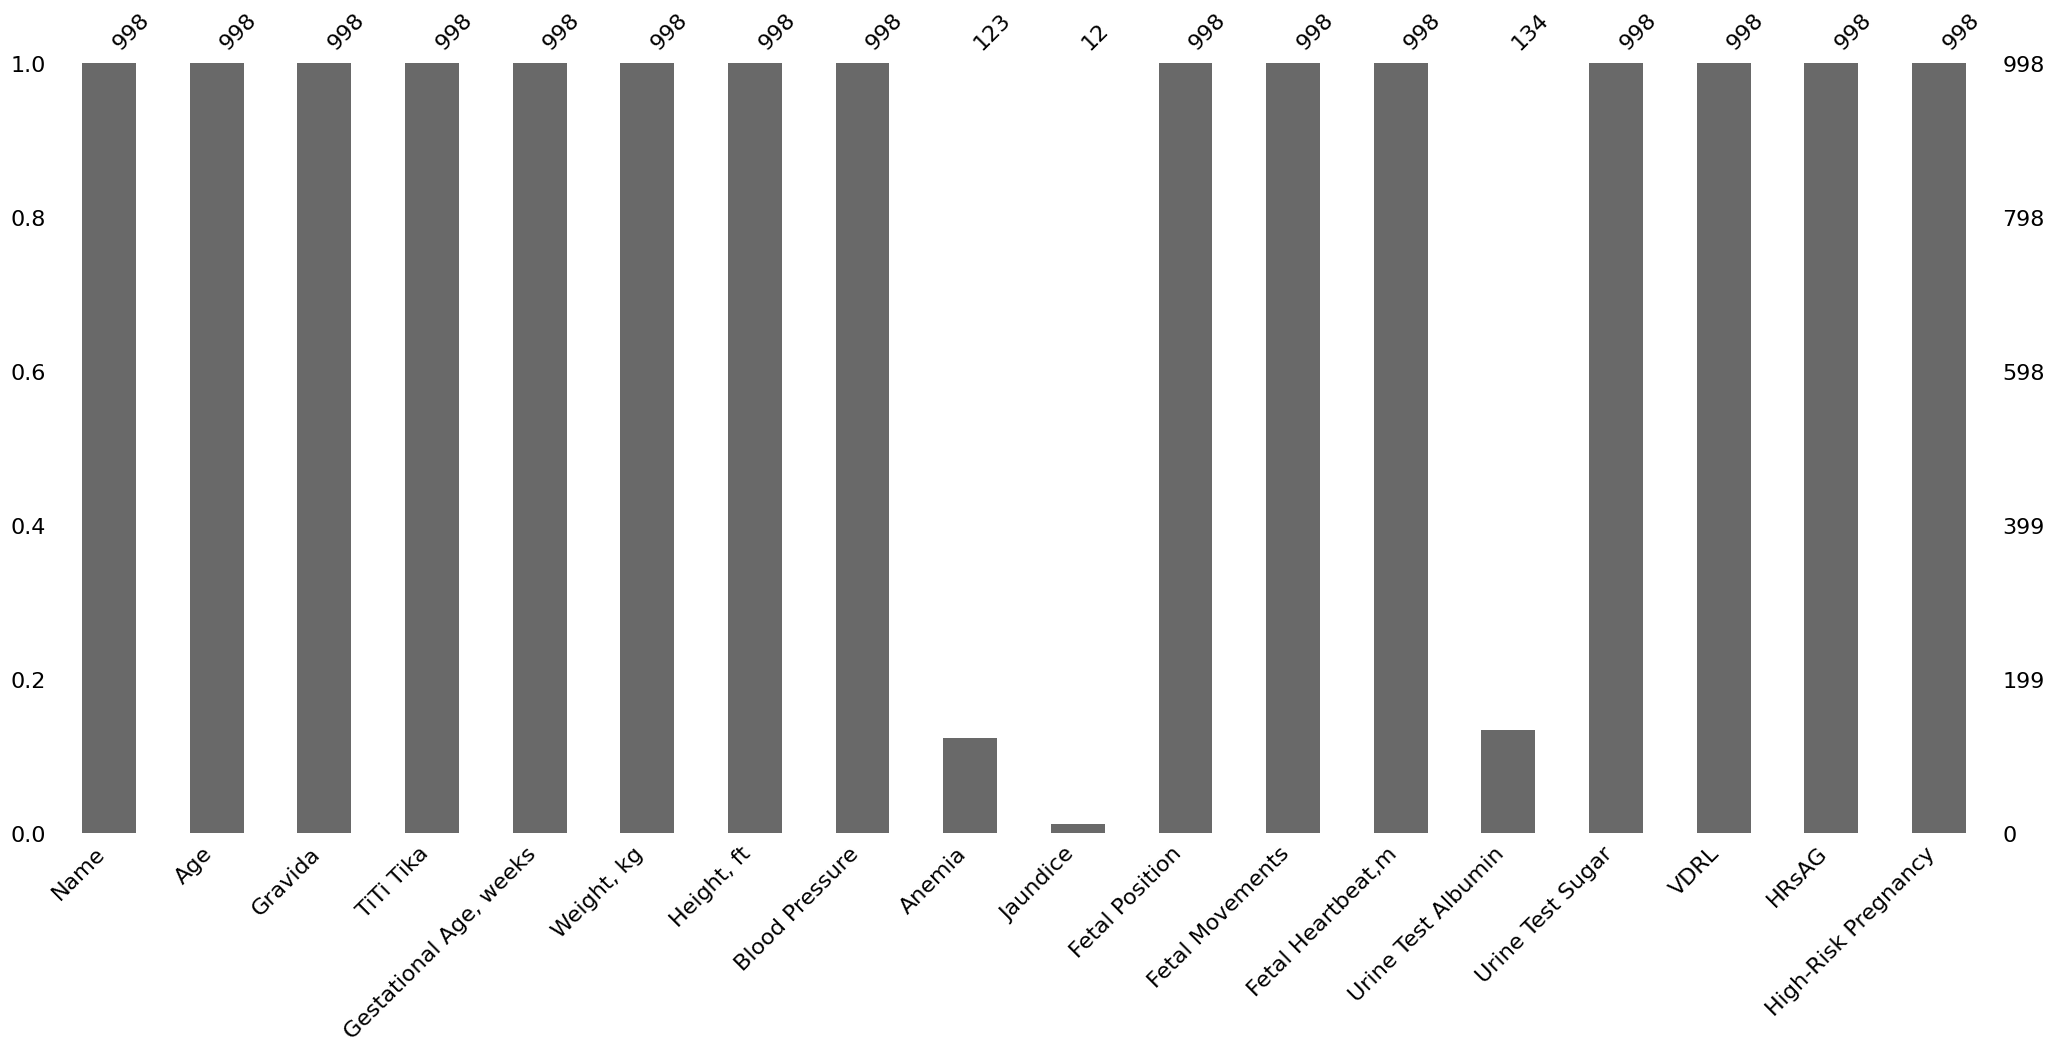

In [188]:
msno.bar(data)

In [189]:
data[['Anemia', 'Jaundice', 'Urine Test Albumin']] = data[['Anemia', 'Jaundice', 'Urine Test Albumin']].fillna('Not found')

In [190]:
data.Jaundice.unique()

array(['Not found', 'Minimal', 'Medium'], dtype=object)

In [191]:
data.Gravida.unique()


array(['1st', '2nd', '3rd'], dtype=object)

**Plotting graphs for better understanding**

<Axes: xlabel='High-Risk Pregnancy', ylabel='count'>

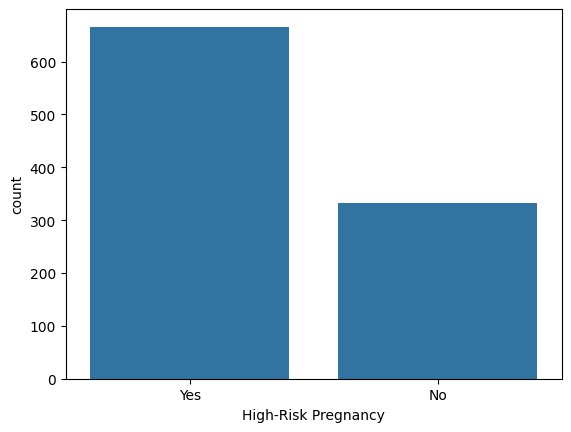

In [192]:
sns.countplot(x = data["High-Risk Pregnancy"]) # there will be count on y axis automatically

<Axes: xlabel='Age', ylabel='count'>

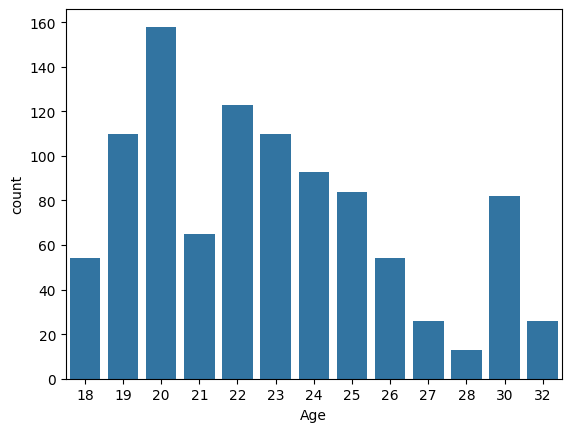

In [193]:
sns.countplot(x = data["Age"])

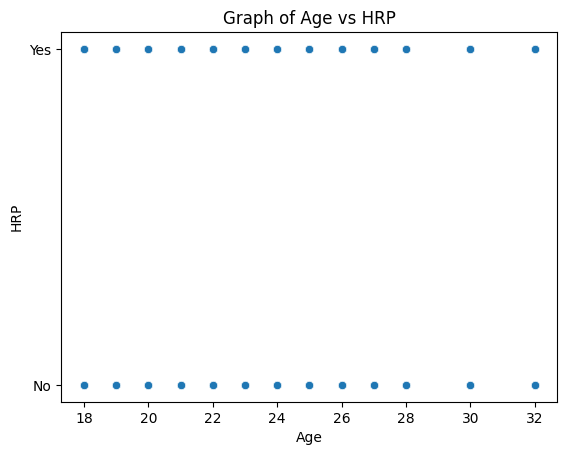

In [194]:
sns.scatterplot(x='Age', y='High-Risk Pregnancy', data=data) # Or sns.lineplot, sns.barplot, etc.
plt.xlabel('Age')
plt.ylabel('HRP')
plt.title('Graph of Age vs HRP')
plt.show()

2. Converting objects to integer values


In [195]:
data_clean = data.copy()

In [196]:
data_clean['Gravida'] = data_clean['Gravida'].str.extract('(\d+)').astype(int)  # Gravida to integers
data_clean['TiTi Tika'] = data_clean['TiTi Tika'].str.extract('(\d+)').astype(int)  # TiTi Tika to integers
data_clean['Gestational Age, weeks'] = data_clean['Gestational Age, weeks'].str.replace(' week', '').astype(int)  # Gestational Age to integers
data_clean['Weight, kg'] = data_clean['Weight, kg'].str.replace(' kg', '').astype(int)  # Weight to integers
data_clean['Fetal Heartbeat,m'] = data_clean['Fetal Heartbeat,m'].str.replace('m', '').astype(int)  # Fetal Heartbeat to integers
data_clean['Height, ft'] = data_clean['Height, ft'].str.replace("''", '').astype(float)  # Height to floats
data_clean['Height, cm'] = round(data_clean['Height, ft'] * 30.48, 2)
data_clean[['Systolic', 'Diastolic']] = data_clean['Blood Pressure'].str.split('/', expand=True)  # Split Blood Pressure
data_clean['Systolic'] = data_clean['Systolic'].astype(int)
data_clean['Diastolic'] = data_clean['Diastolic'].astype(int)


In [197]:
data_clean.head()

,Name,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg","Height, ft",Blood Pressure,Anemia,Jaundice,...,Fetal Movements,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy,"Height, cm",Systolic,Diastolic
1,Rituporna,18,1,1,38,50,5.3,100/60,Not found,Not found,...,Normal,140,Not found,Yes,Negative,Negative,Yes,161.54,100,60
2,Moina,25,2,2,38,60,5.2,100/70,Not found,Not found,...,Normal,130,Not found,Yes,Positive,Negative,No,158.50,100,70
3,Rabeya,20,1,1,30,55,5.0,100/60,Not found,Not found,...,Normal,120,Not found,Yes,Negative,Negative,Yes,152.40,100,60
4,Shorna,22,1,3,35,51,5.4,110/65,Not found,Not found,...,Normal,130,Not found,Yes,Positive,Negative,Yes,164.59,110,65
5,Tania Akter,20,1,2,30,53,5.2,100/55,Not found,Not found,...,Normal,125,Not found,Yes,Negative,Negative,No,158.50,100,55


 **Analyzing null values**

In [198]:
def calculate_quality_metrics(data):
    metrics = {}
    metrics['Missed values'] = data.isna().sum()
    metrics['% of missed values'] = data.isna().mean() * 100
    metrics['Unique values'] = data.nunique()
    metrics['Duplicates'] = data.duplicated().sum()
    return pd.DataFrame(metrics)

In [199]:
calculate_quality_metrics(data_clean)

,Missed values,% of missed values,Unique values,Duplicates
Name,0,0.0,350,0
Age,0,0.0,13,0
Gravida,0,0.0,3,0
TiTi Tika,0,0.0,3,0
"Gestational Age, weeks",0,0.0,11,0
"Weight, kg",0,0.0,14,0
"Height, ft",0,0.0,7,0
Blood Pressure,0,0.0,11,0
Anemia,0,0.0,3,0
Jaundice,0,0.0,3,0


In [200]:
data_1 =data_clean.copy()

In [201]:
columns_to_drop = ['Name', 'Fetal Movements', 'Height, ft', 'Blood Pressure']
data_final = data_1.drop(columns_to_drop, axis =1).reset_index(drop=True)

In [202]:
data_final.head()

,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg",Anemia,Jaundice,Fetal Position,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy,"Height, cm",Systolic,Diastolic
0,18,1,1,38,50,Not found,Not found,Normal,140,Not found,Yes,Negative,Negative,Yes,161.54,100,60
1,25,2,2,38,60,Not found,Not found,Normal,130,Not found,Yes,Positive,Negative,No,158.50,100,70
2,20,1,1,30,55,Not found,Not found,Normal,120,Not found,Yes,Negative,Negative,Yes,152.40,100,60
3,22,1,3,35,51,Not found,Not found,Normal,130,Not found,Yes,Positive,Negative,Yes,164.59,110,65
4,20,1,2,30,53,Not found,Not found,Normal,125,Not found,Yes,Negative,Negative,No,158.50,100,55


In [203]:
data_final.columns

Index(['Age', 'Gravida', 'TiTi Tika', 'Gestational Age, weeks', 'Weight, kg',
       'Anemia', 'Jaundice', 'Fetal Position', 'Fetal Heartbeat,m',
       'Urine Test Albumin', 'Urine Test Sugar', 'VDRL', 'HRsAG',
       'High-Risk Pregnancy', 'Height, cm', 'Systolic', 'Diastolic'],
      dtype='object')

In [204]:
data_encoded = data_final.copy()

In [205]:
columns_to_transform = ['Anemia', 'Jaundice','Fetal Position', 'Urine Test Albumin', 'Urine Test Sugar', 'VDRL', 'HRsAG', 'High-Risk Pregnancy']

In [206]:
# Mapping for  OrdinalEncoder
category_mapping = {}
for e in columns_to_transform:
    list_of_values = data_encoded[e].unique()
    if e == 'Urine Test Albumin':
        list_of_values = ['Not found', 'Minimal', 'Medium', 'Higher']
    if e == 'Urine Test Sugar':
        list_of_values = ['No', 'Yes']
    if e == 'High-Risk Pregnancy':
        list_of_values = ['No', 'Yes']
    category_mapping[e] = list_of_values


In [207]:
category_mapping

{'Anemia': array(['Not found', 'Minimal', 'Medium'], dtype=object),
 'Jaundice': array(['Not found', 'Minimal', 'Medium'], dtype=object),
 'Fetal Position': array(['Normal', 'Abnormal'], dtype=object),
 'Urine Test Albumin': ['Not found', 'Minimal', 'Medium', 'Higher'],
 'Urine Test Sugar': ['No', 'Yes'],
 'VDRL': array(['Negative', 'Positive'], dtype=object),
 'HRsAG': array(['Negative', 'Positive'], dtype=object),
 'High-Risk Pregnancy': ['No', 'Yes']}

In [208]:
for column in columns_to_transform:
    encoder = OrdinalEncoder(categories=[category_mapping[column]])
    data_encoded[column] = encoder.fit_transform(data_encoded[[column]])

In [209]:
data_encoded.head()

,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg",Anemia,Jaundice,Fetal Position,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy,"Height, cm",Systolic,Diastolic
0,18,1,1,38,50,0.0,0.0,0.0,140,0.0,1.0,0.0,0.0,1.0,161.54,100,60
1,25,2,2,38,60,0.0,0.0,0.0,130,0.0,1.0,1.0,0.0,0.0,158.50,100,70
2,20,1,1,30,55,0.0,0.0,0.0,120,0.0,1.0,0.0,0.0,1.0,152.40,100,60
3,22,1,3,35,51,0.0,0.0,0.0,130,0.0,1.0,1.0,0.0,1.0,164.59,110,65
4,20,1,2,30,53,0.0,0.0,0.0,125,0.0,1.0,0.0,0.0,0.0,158.50,100,55


<Axes: >

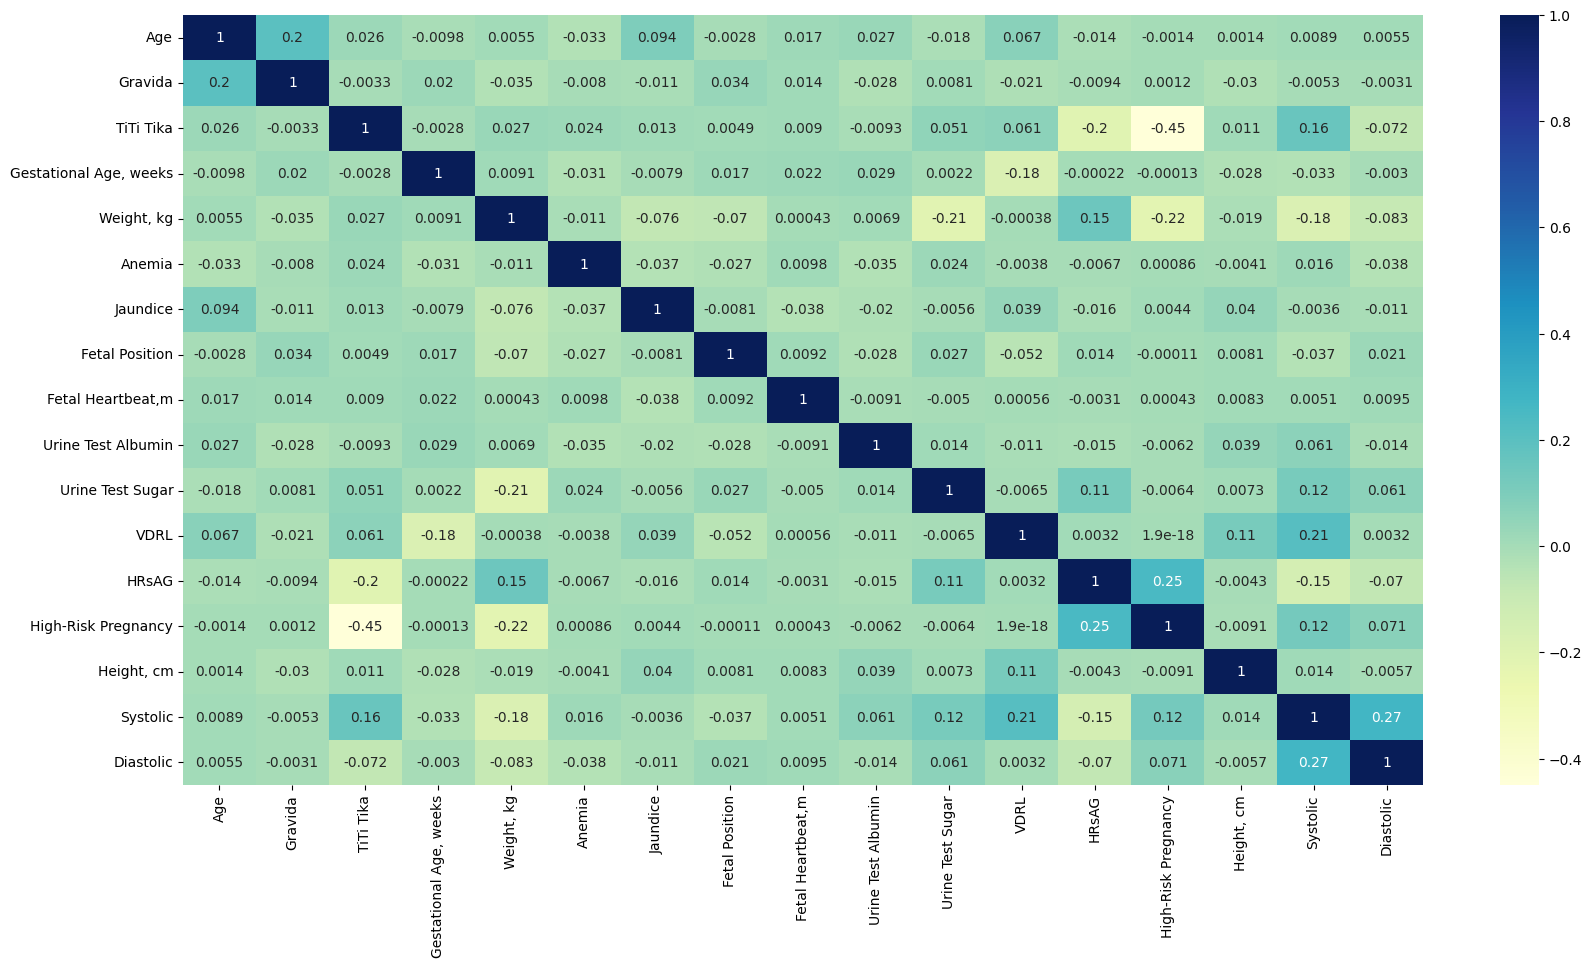

In [210]:
plt.figure(figsize = (20,10))
sns.heatmap(data_encoded.corr(), annot = True, cmap = "YlGnBu")

3. Checking if our data is balanced

In [211]:
X1 = data_encoded['High-Risk Pregnancy']
X1.value_counts()

,count
High-Risk Pregnancy,
1.0,666
0.0,332


In [212]:
X2 = data_encoded['Anemia']
X2.value_counts()

,count
Anemia,
0.0,875
1.0,62
2.0,61


In [213]:
X3 = data_encoded['Jaundice']
X3.value_counts()

,count
Jaundice,
0.0,986
1.0,8
2.0,4


In [214]:
X4 = data_encoded['Fetal Position']
X4.value_counts()

,count
Fetal Position,
0.0,992
1.0,6


In [215]:
X5 = data_encoded['Urine Test Albumin']
X5.value_counts()

,count
Urine Test Albumin,
0.0,864
2.0,48
3.0,44
1.0,42


In [216]:
X6 = data_encoded['Urine Test Sugar']
X6.value_counts()

,count
Urine Test Sugar,
1.0,890
0.0,108


In [217]:
X7 = data_encoded['VDRL']
X7.value_counts()

,count
VDRL,
0.0,499
1.0,499


In [218]:
X8 = data_encoded['HRsAG']
X8.value_counts()

,count
HRsAG,
0.0,889
1.0,109


In [219]:
data_encoded.drop(columns = ['Jaundice', 'Fetal Position'])

,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg",Anemia,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,High-Risk Pregnancy,"Height, cm",Systolic,Diastolic
0,18,1,1,38,50,0.0,140,0.0,1.0,0.0,0.0,1.0,161.54,100,60
1,25,2,2,38,60,0.0,130,0.0,1.0,1.0,0.0,0.0,158.50,100,70
2,20,1,1,30,55,0.0,120,0.0,1.0,0.0,0.0,1.0,152.40,100,60
3,22,1,3,35,51,0.0,130,0.0,1.0,1.0,0.0,1.0,164.59,110,65
4,20,1,2,30,53,0.0,125,0.0,1.0,0.0,0.0,0.0,158.50,100,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,22,1,1,20,49,0.0,150,0.0,1.0,1.0,0.0,1.0,170.69,90,60
994,22,1,2,30,45,0.0,140,0.0,1.0,0.0,0.0,0.0,161.54,110,80
995,19,1,3,30,50,0.0,140,0.0,1.0,1.0,0.0,1.0,158.50,100,70
996,30,2,2,30,49,0.0,130,0.0,1.0,0.0,0.0,1.0,155.45,90,60


# III. Model Building

1. Linear Regression Model

In [242]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(['High-Risk Pregnancy'], axis = 1)
y = data_encoded['High-Risk Pregnancy']

In [243]:
X

,Age,Gravida,TiTi Tika,"Gestational Age, weeks","Weight, kg",Anemia,Jaundice,Fetal Position,"Fetal Heartbeat,m",Urine Test Albumin,Urine Test Sugar,VDRL,HRsAG,"Height, cm",Systolic,Diastolic
0,18,1,1,38,50,0.0,0.0,0.0,140,0.0,1.0,0.0,0.0,161.54,100,60
1,25,2,2,38,60,0.0,0.0,0.0,130,0.0,1.0,1.0,0.0,158.50,100,70
2,20,1,1,30,55,0.0,0.0,0.0,120,0.0,1.0,0.0,0.0,152.40,100,60
3,22,1,3,35,51,0.0,0.0,0.0,130,0.0,1.0,1.0,0.0,164.59,110,65
4,20,1,2,30,53,0.0,0.0,0.0,125,0.0,1.0,0.0,0.0,158.50,100,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,22,1,1,20,49,0.0,0.0,0.0,150,0.0,1.0,1.0,0.0,170.69,90,60
994,22,1,2,30,45,0.0,0.0,1.0,140,0.0,1.0,0.0,0.0,161.54,110,80
995,19,1,3,30,50,0.0,0.0,0.0,140,0.0,1.0,1.0,0.0,158.50,100,70
996,30,2,2,30,49,0.0,0.0,0.0,130,0.0,1.0,0.0,0.0,155.45,90,60


In [244]:
y

,High-Risk Pregnancy
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
993,1.0
994,0.0
995,1.0
996,1.0


In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [246]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [247]:
X_train.shape, y_train.shape

((798, 16), (798,))

In [248]:
X_test.shape, y_test.shape

((200, 16), (200,))

In [249]:
reg.score(X_test, y_test)

0.3233996150687368

We get 32% accuracy using the linear regression model. Even after scaling the parameters, there is no improvement in accuracy of the model.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_s, y_train)

reg.score(X_test_s, y_test)

 2. Random Forest Regressor




In [228]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [229]:
forest.score(X_test, y_test)

0.9184387464387465

Using random forest regressor, we get 91% accuracy.

3. Random Forest Classifier

In [230]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [231]:
print(clf.score(X_test, y_test))

0.975


Using random forest classifier, we get the best accuracy so far which is 97.5%.